### aim: plot a few points under different cartopy configurations - for Nina

### date started: Dec 6, 2022

In [56]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [57]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [58]:
import numpy as np
import cartopy as cp
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

%matplotlib inline
import cartopy.feature as cfeature

import pandas as pd
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### open file and take out what we need as arrays 

I find it easier to work with arrays than with pandas dataframes, but many people are opposite 
there is probably shorter/tidier syntax but this one works


In [59]:
tf = pd.read_excel('nina-shiptrack/M187_DSHIP_track_1min_avg.xlsx') #ship track
df_obs = pd.read_excel('nina-shiptrack/006-Folder-rP-Es.xlsx') #observations

print('ship track file variables')
print(tf.columns)
print()
print('obs file variables')
print(df_obs.columns)

track_time = tf['date time'].values
track_lat = tf['SYS.STR.PosLat'].values
track_lon = tf['SYS.STR.PosLon'].values

obs_time = df_obs['datetime'].values
obs_rho = df_obs['Rho'].values



ship track file variables
Index(['date time', 'SYS.DISP.ActName', 'SYS.STR.DPT', 'SYS.STR.PosLat',
       'SYS.STR.PosLon', 'SYS.STR.Speed', 'TSG1.SBE21.Density',
       'TSG1.SBE21.Salinity', 'TSG1.SBE21.TempExtern',
       'TSG1.SBE21.Temperature', 'TSG2.SBE21.Density', 'TSG2.SBE21.Salinity',
       'TSG2.SBE21.TempExtern', 'TSG2.SBE21.Temperature',
       'WEATHER.PBWWI.AirTempPort', 'WEATHER.PBWWI.AirTempStarboard',
       'WEATHER.PBWWI.WaterTempPort', 'WEATHER.PBWWI.WaterTempStarboard',
       'WEATHER.PBWWI.TrueWindDir', 'WEATHER.PBWWI.TrueWindSpeed'],
      dtype='object')

obs file variables
Index(['datetime', 'Date', 'Time', 'Seconds', 'Hours', 'PEC', 'cPEC', 'cPEP',
       'aLHII', 'High E', 'Alpha', 'Ek', 'Beta', 'EkBeta', 'rPm', 'JVPIIm',
       'GOPIIm', 'Fo', 'Fm', 'Fv/Fm', 'Fv/Fmc', 'AlphaPII', 'SigmaPII', 'Rho',
       'TauS', 'Sample °C', 'System °C', 'Reference', 'Note'],
      dtype='object')


## a janky for loop that nevertheless does what we need

for each observational index, find the track time that is closest, extract index, get lat and lon of that index 

In [60]:
track_time_closest_to_obs_time = np.copy(obs_time) #for saving closest times
index_obs = np.zeros(len(obs_time)) #for saving indices of that time
lat_obs = np.zeros(len(obs_time))
lon_obs = np.zeros(len(obs_time))

for i in range(0,len(obs_time)):
    tobs = obs_time[i] #our observational time
    closest = min(track_time, key=lambda d: abs(d - tobs)) #closest track time to our obs time
    index_obs = (np.where(track_time == closest)[0][0]) #array iindex
    track_time_closest_to_obs_time[i] = closest # save the track time as well for comparison
    lat_obs[i] = track_lat[index_obs]
    lon_obs[i] = track_lon[index_obs]
    

## make sure that time of obs and time on track that we extracted that is closest to time of obs are reasonably similar

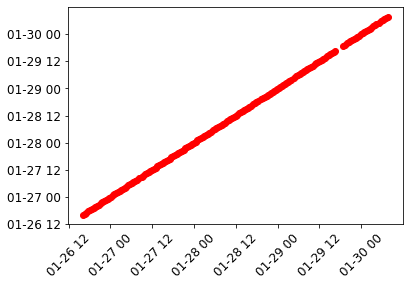

In [61]:
plt.plot(obs_time, track_time_closest_to_obs_time,'ro')
q = plt.xticks(rotation = 45)

## where in the world is Nina's data!?

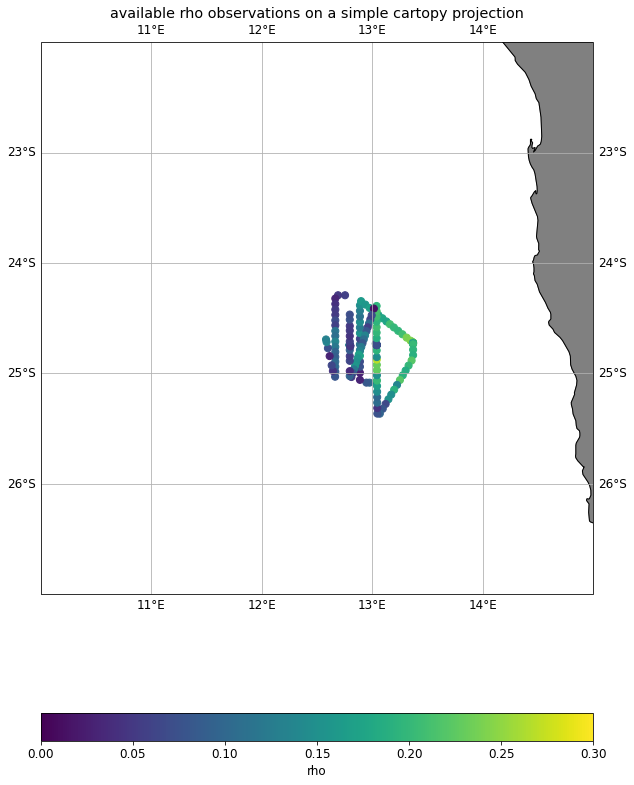

In [62]:

fact = 0.8
tfig = plt.figure(figsize=[10.5*fact, 14.5*fact])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#lons, lats extent
ax.set_extent([10, 15, -22, -27], crs=ccrs.PlateCarree())
mesh = plt.scatter(lon_obs, lat_obs, s = 50, c = obs_rho, vmin = 0, vmax = 0.3, cmap = 'viridis',
                 transform=ccrs.PlateCarree())
plt.colorbar(mesh, orientation = 'horizontal', label = 'rho')
ax.add_feature(cp.feature.LAND, color='grey')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title('available rho observations on a simple cartopy projection')
plt.tight_layout()
plt.show()

### let's save the lats and lons for safekeeping

In [65]:
df_obs['lat'] = lat_obs
df_obs['lon'] = lon_obs

In [66]:
df_obs.to_csv('nina_shiptrack_withlatlon.csv')

In [67]:
w = pd.read_csv('nina_shiptrack_withlatlon.csv')
w.head()

,Unnamed: 0,datetime,Date,Time,Seconds,Hours,PEC,cPEC,cPEP,aLHII,...,AlphaPII,SigmaPII,Rho,TauS,Sample °C,System °C,Reference,Note,lat,lon
0,0,2023-01-26 16:16:00,2023-01-26 00:00:00,16:16:00,0,0.000,0.1744,0.5451,0.4227,0.03908,...,0.08080,8.501,0.16060,24279,20.0,31.8,NaN,006_exp2,-25.083537,13.027007
1,1,2023-01-26 16:43:00,2023-01-26 00:00:00,16:43:00,1640,0.456,NaN,NaN,NaN,NaN,...,0.07052,9.205,0.10210,16457,21.1,31.9,NaN,006_exp2,-25.083332,12.974846
2,2,2023-01-26 16:58:00,2023-01-26 00:00:00,16:58:00,2518,0.699,0.1643,0.5135,0.4539,0.03613,...,0.08456,8.639,0.08249,29136,21.7,32.6,NaN,006_exp2,-25.083194,12.946544
3,3,2023-01-26 17:40:00,2023-01-26 00:00:00,17:40:00,5060,1.406,0.1681,0.5253,0.4936,0.02791,...,0.07279,6.144,0.02938,25915,21.9,33.2,NaN,006_exp2,-25.058205,12.887956
4,4,2023-01-26 18:15:00,2023-01-26 00:00:00,18:15:00,7179,1.994,0.1723,0.5385,0.4537,0.04155,...,0.07322,8.301,0.02698,33929,21.3,32.9,NaN,006_exp2,-24.994141,12.887948
